In [2]:
import keras
import tensorflow as tf
import pickle
from glob import glob
from more_itertools import chunked
import tensorflow_hub as hub
from keras.preprocessing import image
from keras.utils import load_img, img_to_array
import numpy as np

2023-01-27 11:40:37.321141: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
bitnet = keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/bit/m-r50x1/1", trainable=False),
])
bitnet.build([None, 480, 480, 3])

2023-01-27 11:40:40.867576: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-27 11:40:40.886825: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-27 11:40:40.887049: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-27 11:40:40.887549: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other oper

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [6]:
all_images = glob('./data/f30k/*.jpg')
all_chunked = list(chunked(all_images, 32))

images_processed = []

for chunk_index, chunk in enumerate(all_chunked):

  print(f"Processing chunk {chunk_index}... of {len(all_chunked)}")

  img_list = []
  for path in chunk:
    img = load_img(path, target_size=(480, 480))
    img = img_to_array(img)
    img_list.append(img)
  
  preds = bitnet.predict_on_batch(np.array(img_list))
  for index, path in enumerate(chunk):
    images_processed.append({
        'path': path,
        'feature_vector': preds[index]
    })

with open('data/f30k_bitnet.pickle', 'wb') as f:
  pickle.dump(images_processed, f, protocol=pickle.HIGHEST_PROTOCOL)
print("Done")

Processing chunk 0... of 994


2023-01-27 01:45:00.473758: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.02GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-01-27 01:45:00.516506: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.02GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-01-27 01:45:01.627135: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.30GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-01-27 01:45:02.324606: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU

Processing chunk 1... of 994
Processing chunk 2... of 994
Processing chunk 3... of 994
Processing chunk 4... of 994
Processing chunk 5... of 994
Processing chunk 6... of 994
Processing chunk 7... of 994
Processing chunk 8... of 994
Processing chunk 9... of 994
Processing chunk 10... of 994
Processing chunk 11... of 994
Processing chunk 12... of 994
Processing chunk 13... of 994
Processing chunk 14... of 994
Processing chunk 15... of 994
Processing chunk 16... of 994
Processing chunk 17... of 994
Processing chunk 18... of 994
Processing chunk 19... of 994
Processing chunk 20... of 994
Processing chunk 21... of 994
Processing chunk 22... of 994
Processing chunk 23... of 994
Processing chunk 24... of 994
Processing chunk 25... of 994
Processing chunk 26... of 994
Processing chunk 27... of 994
Processing chunk 28... of 994
Processing chunk 29... of 994
Processing chunk 30... of 994
Processing chunk 31... of 994
Processing chunk 32... of 994
Processing chunk 33... of 994
Processing chunk 34

In [4]:
with open('data/f30k_bitnet.pickle', 'rb') as f:
  images_processed = pickle.load(f)

./data/f30k/112604461.jpg


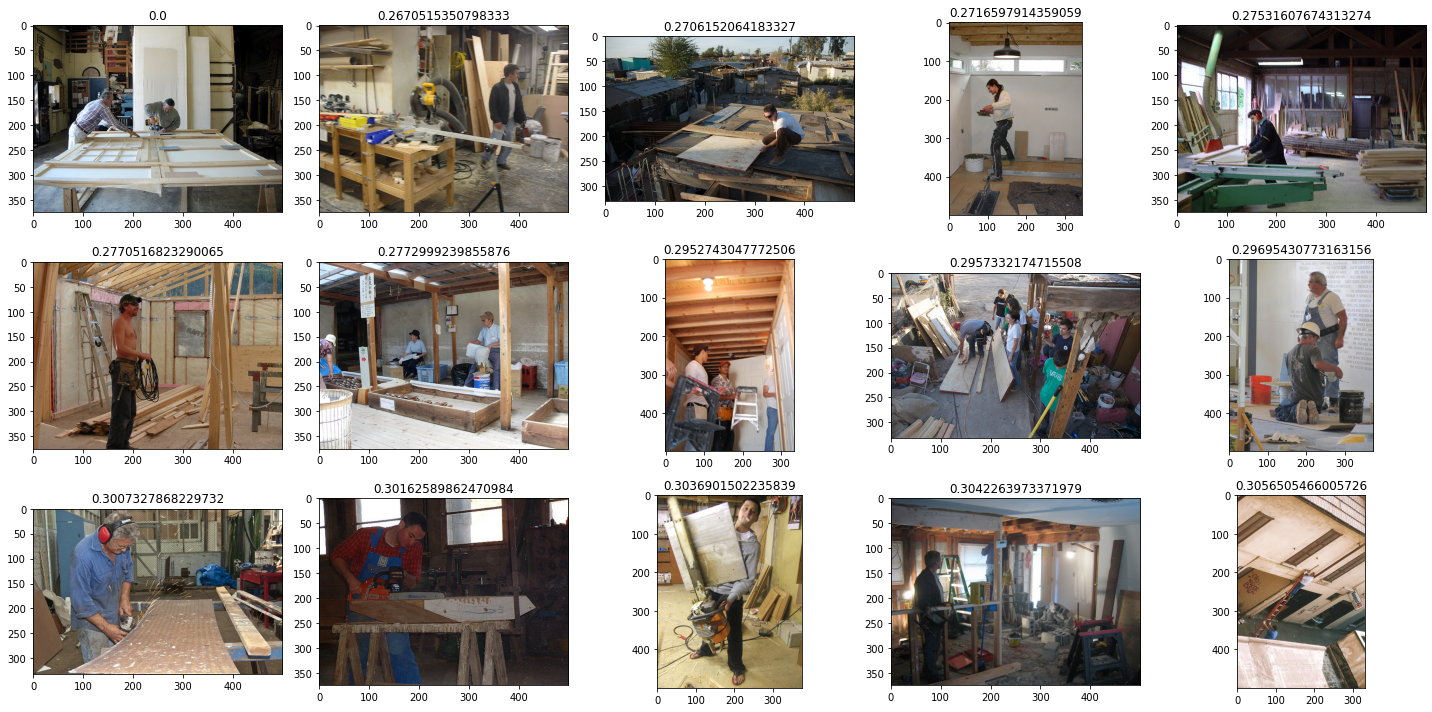

In [167]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as distance
import cv2

random_image = random.choice(images_processed)
print(random_image['path'])
distances = []
for image in images_processed:
  distances.append({
      'path': image['path'],
      'distance': distance.braycurtis(random_image['feature_vector'], image['feature_vector'])
  })

distances = sorted(distances, key=lambda x: x['distance'])

fig, axs = plt.subplots(3, 5, figsize=(20, 10))

for index, ax in enumerate(axs.flat):
  ax.imshow(cv2.cvtColor(cv2.imread(distances[index]['path']), cv2.COLOR_BGR2RGB))
  ax.set_title(distances[index]['distance'])
  
plt.tight_layout()
plt.show()